<a href="https://colab.research.google.com/github/shyamikdas/TinyML/blob/main/tflite_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow is an open source machine learning library
!pip install tensorflow==2.17.1
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

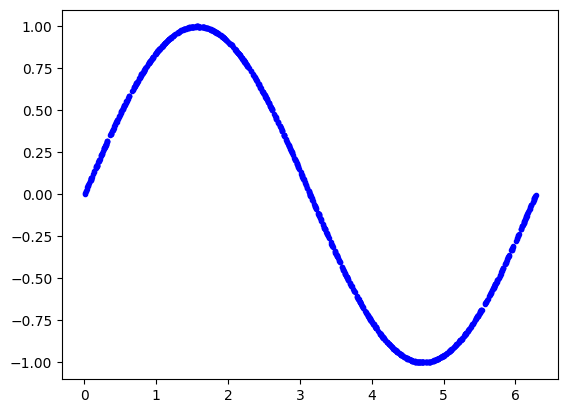

In [2]:
# We'll generate this many sample datapoints
SAMPLES = 1000
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

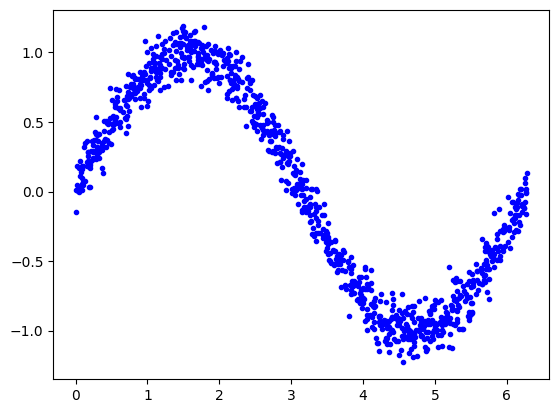

In [3]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

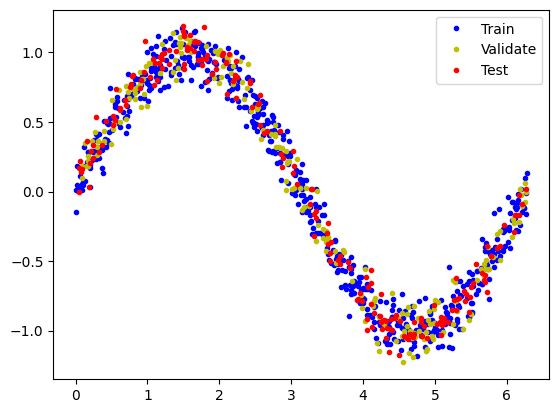

In [4]:
#SPLITTING DATA

# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()


In [5]:
# We'll use Keras to create a simple model architecture
from keras import layers
model_1 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons."
#The neurons decide whether to activate based on the 'relu' activationfunction.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print a summary of the model's architecture
model_1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,validation_data=(x_validate, y_validate))


Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.6709 - mae: 0.7289 - val_loss: 0.5235 - val_mae: 0.6458
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4610 - mae: 0.6037 - val_loss: 0.4434 - val_mae: 0.5848
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3977 - mae: 0.5508 - val_loss: 0.3944 - val_mae: 0.5463
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3561 - mae: 0.5189 - val_loss: 0.3548 - val_mae: 0.5152
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3211 - mae: 0.4933 - val_loss: 0.3201 - val_mae: 0.4875
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2905 - mae: 0.4699 - val_loss: 0.2900 - val_mae: 0.4633
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2641 - mae: 0.4491 - val_loss: 0.2645 - val_mae: 0.4422
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2418 - mae: 0.4313 - val_loss: 0.2435 - val_mae: 0.4252
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

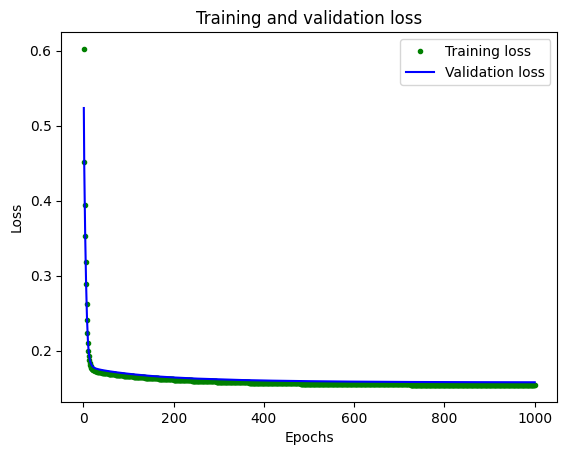

In [7]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons."
# Theneurons decide whether to activate based on the 'relu' activatio
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5279 - mae: 0.6392 - val_loss: 0.4103 - val_mae: 0.5563
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3680 - mae: 0.5260 - val_loss: 0.3453 - val_mae: 0.5070
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3108 - mae: 0.4850 - val_loss: 0.2898 - val_mae: 0.4634
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2621 - mae: 0.4465 - val_loss: 0.2454 - val_mae: 0.4265
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2237 - mae: 0.4134 - val_loss: 0.2116 - val_mae: 0.3964
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1961 - mae: 0.3870 - val_loss: 0.1890 - val_mae: 0.3743
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1780 - mae: 0.3664 - val_loss: 0.1752 - val_mae: 0.3588
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1673 - mae: 0.3518 - val_loss: 0.1665 - val_mae: 0.3480
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.16

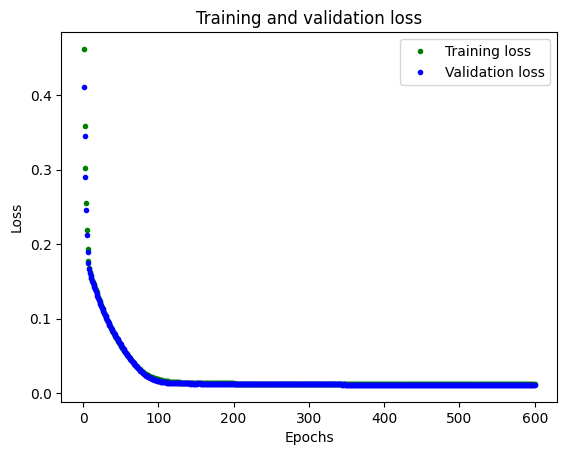

In [10]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

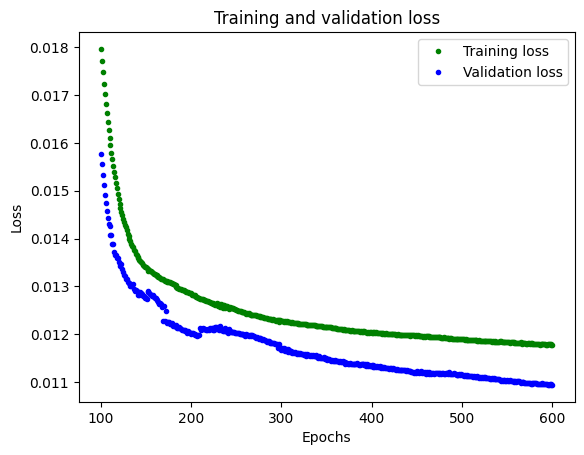

In [11]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

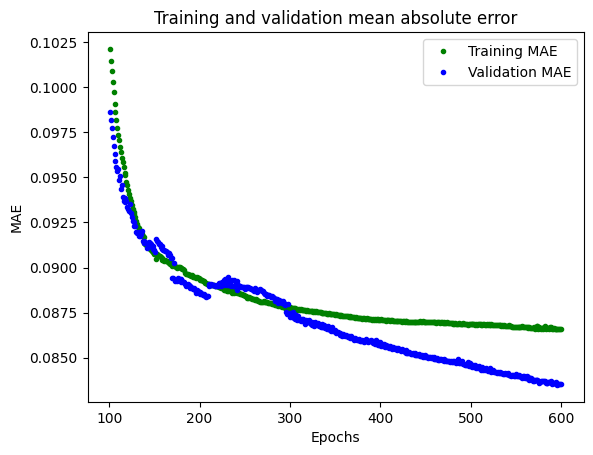

In [12]:
plt.clf()
# Draw a graph of mean absolute error, which is another way of # measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

testing

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - mae: 0.0746 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


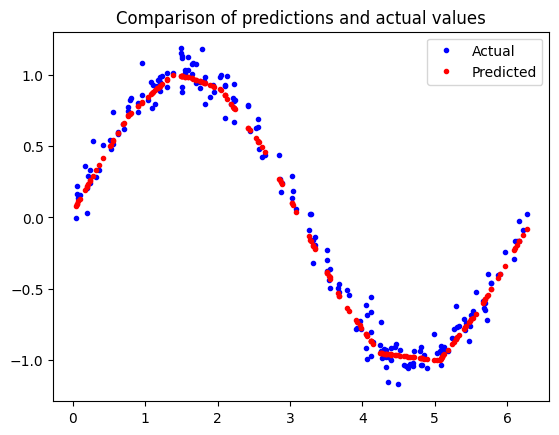

In [13]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [14]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values # as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrappedin a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()
# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)


Saved artifact at '/tmp/tmpuq976h2w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133296933837936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133296934041936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133296934040528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133296934133376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133296934134784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133296934135664: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmpooia60hx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133296933837936: TensorSpe

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


3776

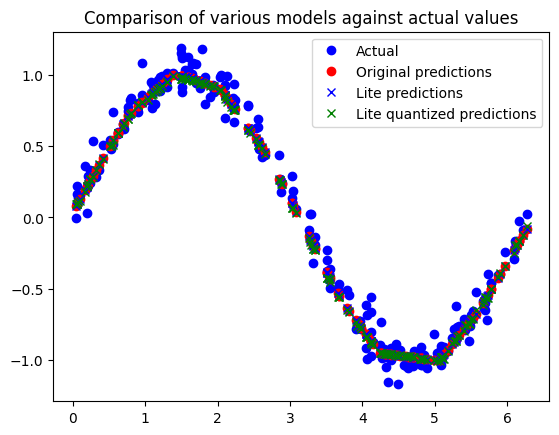

In [15]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')
# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()
# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0] ["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
sine_model_quantized.get_output_details()[0]["index"]
# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []
# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor and extract the single value
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  # Read the prediction from the output tensor and extract the single value
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0]) # Extract the single value from the tensor

# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

In [16]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 3152 bytes
Quantized model is 3776 bytes
Difference is -624 bytes


In [17]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0x0c, 0x01, 0x00, 0x00,
  0x00, 0x04, 0x00, 0x00, 0x10, 0x04, 0x00, 0x00, 0x34, 0x0e, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xae, 0xfb, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x68, 0xff, 0xff, 0xff,
  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x6f, 0x75, 0x74, 0x70, 0x75, 0x74, 0x5f, 0x30, 0x00, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x86, 0xfc, 0x